In [1]:
%pip install --upgrade pandas-datareader
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
import yfinance as yf
# Get the stock data using yfinance API:
# get 2009-2019 data to train our model
train_data = yf.download('BBCA.JK', start='2010-01-04', end='2019-12-03')

# get 2020 data to present date to test the SVM model
# test_data = yf.download('BBCA.JK', start='2020-01-02', end=datetime.date.today())
test_data = yf.download('BBCA.JK', start='2020-01-04', end='2021-12-03')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
train_data.columns = train_data.columns.droplevel(-1)
train_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,796.387512,1010.0,1010.0,965.0,1010.0,77812500
2010-01-05,804.272827,1020.0,1020.0,990.0,1020.0,44442500
2010-01-06,780.617737,990.0,1020.0,990.0,990.0,27782500
2010-01-07,784.560303,995.0,995.0,965.0,995.0,38632500
2010-01-08,764.847717,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...
2019-11-26,5619.019531,6285.0,6330.0,6270.0,6330.0,192783500
2019-11-27,5632.429688,6300.0,6300.0,6240.0,6270.0,58833500
2019-11-28,5587.729492,6250.0,6295.0,6245.0,6295.0,44248000


In [50]:
test_data.columns = test_data.columns.droplevel(-1)
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-06,6040.392090,6735.0,6750.0,6690.0,6720.0,27300000
2020-01-07,6044.875977,6740.0,6770.0,6730.0,6735.0,45022500
2020-01-08,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
2020-01-09,6044.875977,6740.0,6755.0,6730.0,6740.0,40363500
2020-01-10,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...
2021-11-26,6773.578125,7275.0,7450.0,7250.0,7400.0,113288400
2021-11-29,6889.962891,7400.0,7425.0,7175.0,7275.0,87907900
2021-11-30,6773.578125,7275.0,7425.0,7275.0,7325.0,144923700


In [51]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

date_test = test_data.copy()
date_test = date_test.reset_index()

In [52]:
train_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,796.387512,1010.0,1010.0,965.0,1010.0,77812500
2010-01-05,804.272827,1020.0,1020.0,990.0,1020.0,44442500
2010-01-06,780.617737,990.0,1020.0,990.0,990.0,27782500
2010-01-07,784.560303,995.0,995.0,965.0,995.0,38632500
2010-01-08,764.847717,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...
2019-11-26,5619.019531,6285.0,6330.0,6270.0,6330.0,192783500
2019-11-27,5632.429688,6300.0,6300.0,6240.0,6270.0,58833500
2019-11-28,5587.729492,6250.0,6295.0,6245.0,6295.0,44248000


In [53]:
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-06,6040.392090,6735.0,6750.0,6690.0,6720.0,27300000
2020-01-07,6044.875977,6740.0,6770.0,6730.0,6735.0,45022500
2020-01-08,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
2020-01-09,6044.875977,6740.0,6755.0,6730.0,6740.0,40363500
2020-01-10,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...
2021-11-26,6773.578125,7275.0,7450.0,7250.0,7400.0,113288400
2021-11-29,6889.962891,7400.0,7425.0,7175.0,7275.0,87907900
2021-11-30,6773.578125,7275.0,7425.0,7275.0,7325.0,144923700


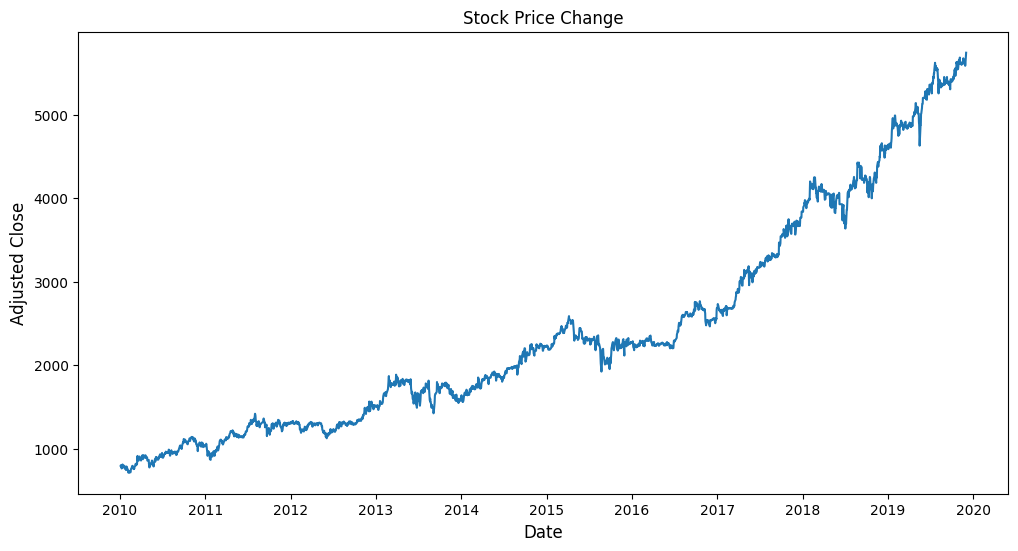

In [54]:
from matplotlib import pyplot as plt

#style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

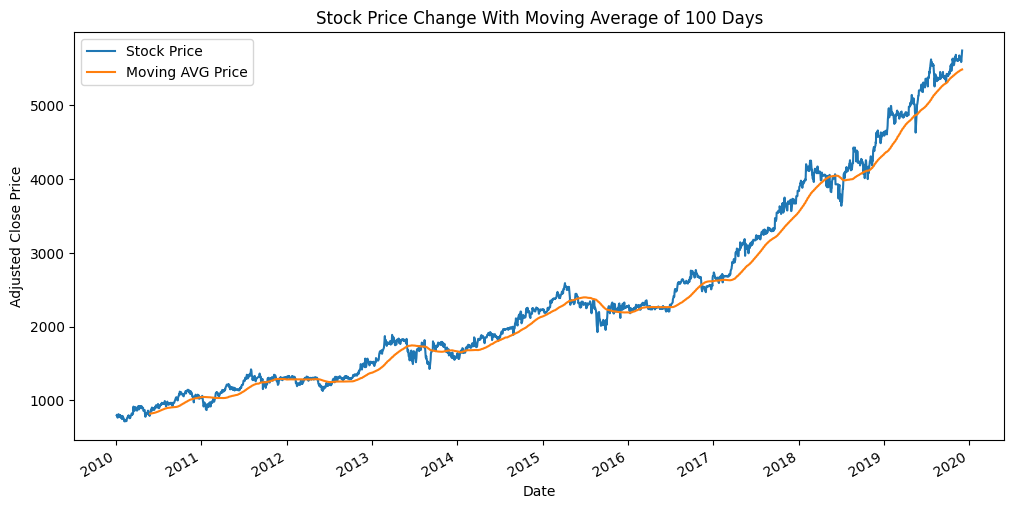

In [55]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [56]:

import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,14613.0,796.387512,1010.0,1010.0,965.0,1010.0,77812500
1,14614.0,804.272827,1020.0,1020.0,990.0,1020.0,44442500
2,14615.0,780.617737,990.0,1020.0,990.0,990.0,27782500
3,14616.0,784.560303,995.0,995.0,965.0,995.0,38632500
4,14617.0,764.847717,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...,...
2467,18226.0,5619.019531,6285.0,6330.0,6270.0,6330.0,192783500
2468,18227.0,5632.429688,6300.0,6300.0,6240.0,6270.0,58833500
2469,18228.0,5587.729492,6250.0,6295.0,6245.0,6295.0,44248000
2470,18229.0,5614.549805,6280.0,6295.0,6225.0,6230.0,52954500


In [57]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [58]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
SVR_linear_train

array([ 479.16342005,  480.17779546,  481.1921709 , ..., 4146.13054108,
       4147.14491648, 4150.18804272])

In [60]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
SVR_rbfk_train

array([ 796.48712614,  795.42243841,  794.80351631, ..., 5587.82919486,
       5614.45013775, 5744.08461701])

In [62]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
SVR_poly_train

array([ 731.68989853,  732.80380201,  733.91658398, ..., 5769.30681021,
       5773.28884499, 5785.25120965])

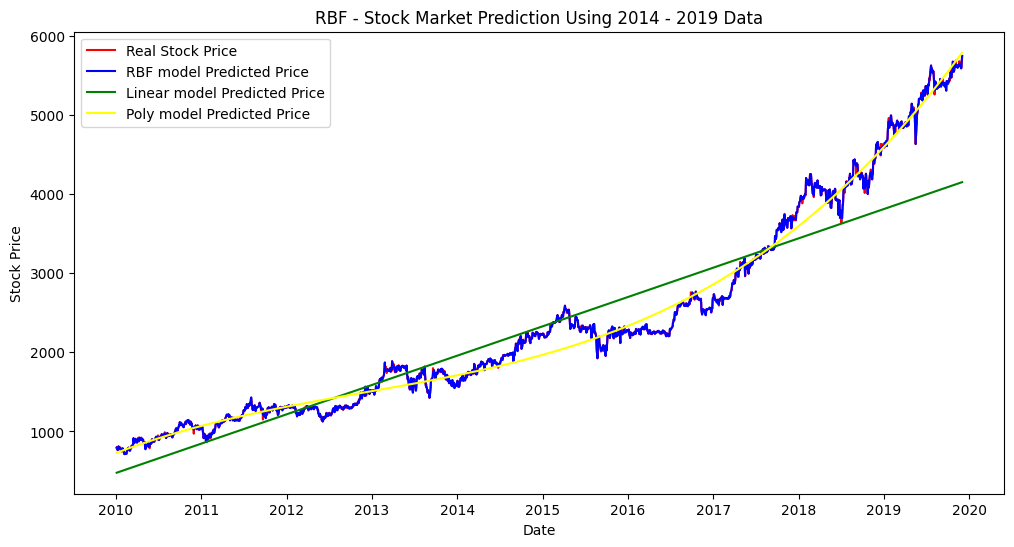

In [64]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [65]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [66]:
test_indxed_dates

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,18267.0,6040.392090,6735.0,6750.0,6690.0,6720.0,27300000
1,18268.0,6044.875977,6740.0,6770.0,6730.0,6735.0,45022500
2,18269.0,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
3,18270.0,6044.875977,6740.0,6755.0,6730.0,6740.0,40363500
4,18271.0,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...,...
462,18957.0,6773.578125,7275.0,7450.0,7250.0,7400.0,113288400
463,18960.0,6889.962891,7400.0,7425.0,7175.0,7275.0,87907900
464,18961.0,6773.578125,7275.0,7425.0,7275.0,7325.0,144923700
465,18962.0,6796.854492,7300.0,7450.0,7275.0,7275.0,76538100


In [67]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [68]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6040.29226521, 6044.77566328, 6045.10919052, 6044.77614021,
       6031.52201313, 6049.46068853, 6098.0280442 , 6129.97834133,
       6148.71871673, 6165.85319094, 6129.97836186, 6125.69486778,
       6134.46262284, 6129.27405157, 6107.75706862, 6134.46301833,
       6134.90412733, 6085.1341553 , 5969.3627603 , 5811.7904732 ,
       5775.91606599, 5919.21416536, 6021.51514835, 6059.18521027,
       6062.71303758, 6085.13371723, 6102.27612174, 6098.58837046,
       6053.21368745, 5991.16330359, 6026.83867672, 6021.98069963,
       5986.73044073, 5953.24019045, 5932.66720108, 5852.14998448,
       5808.16733846, 5757.97844758, 5705.37306042, 5641.18627754,
       5541.52851651, 5668.0919729 , 5775.9162711 , 5742.20843933,
       5560.6679392 , 5285.8553552 , 5313.83067862, 5233.87801033,
       5078.96802205, 4986.67380122, 4986.47378378, 4747.81966965,
       4484.42955981, 4321.13662587, 4246.56003659, 3973.21616778,
       4100.32969233, 4735.35116318, 4941.83137302, 4976.20313

In [69]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5624.46365198, 5625.09577224, 5625.72789249, 5626.36001274,
       5626.992133  , 5628.88849375, 5629.52061401, 5630.15273426,
       5630.78485451, 5631.41697477, 5633.31333553, 5633.94545578,
       5634.57757603, 5635.20969629, 5635.84181654, 5637.7381773 ,
       5638.37029755, 5639.00241781, 5639.63453806, 5640.26665831,
       5642.16301907, 5642.79513933, 5643.42725958, 5644.05937983,
       5644.69150009, 5646.58786085, 5647.2199811 , 5647.85210135,
       5648.48422161, 5649.11634186, 5651.01270262, 5651.64482287,
       5652.27694313, 5652.90906338, 5653.54118363, 5655.43754439,
       5656.06966465, 5656.7017849 , 5657.33390515, 5657.96602541,
       5659.86238616, 5660.49450642, 5661.12662667, 5661.75874692,
       5662.39086718, 5664.28722794, 5664.91934819, 5665.55146844,
       5666.1835887 , 5666.81570895, 5668.71206971, 5669.34418996,
       5669.97631022, 5670.60843047, 5671.24055072, 5673.13691148,
       5673.76903174, 5675.03327224, 5675.6653925 , 5677.56175

In [70]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6529.37513968, 6498.3309411 , 6467.68644075, 6437.43902241,
       6407.58607731, 6320.3681057 , 6292.06711518, 6264.14766606,
       6236.60719436, 6209.4431436 , 6130.18406395, 6104.50028128,
       6079.18024907, 6054.22145561, 6029.62139668, 5957.9486968 ,
       5934.75868306, 5911.91499473, 5889.41517237, 5867.25676403,
       5802.80561561, 5781.98849315, 5761.50063695, 5741.33963984,
       5721.50310214, 5663.9163607 , 5645.35381315, 5627.10383861,
       5609.16408217, 5591.53219644, 5540.46040134, 5524.03667363,
       5507.90919155, 5492.07565251, 5476.53376135, 5431.6351358 ,
       5417.23703411, 5403.1192166 , 5389.27943294, 5375.71544025,
       5336.65589128, 5324.1727831 , 5311.95436354, 5299.99843453,
       5288.30280547, 5254.75592399, 5244.07973807, 5233.65301111,
       5223.4735973 , 5213.53935833, 5185.18641908, 5176.21164547,
       5167.47146704, 5158.96379028, 5150.68652912, 5127.21649068,
       5119.84018069, 5105.74581141, 5099.02367708, 5080.13318

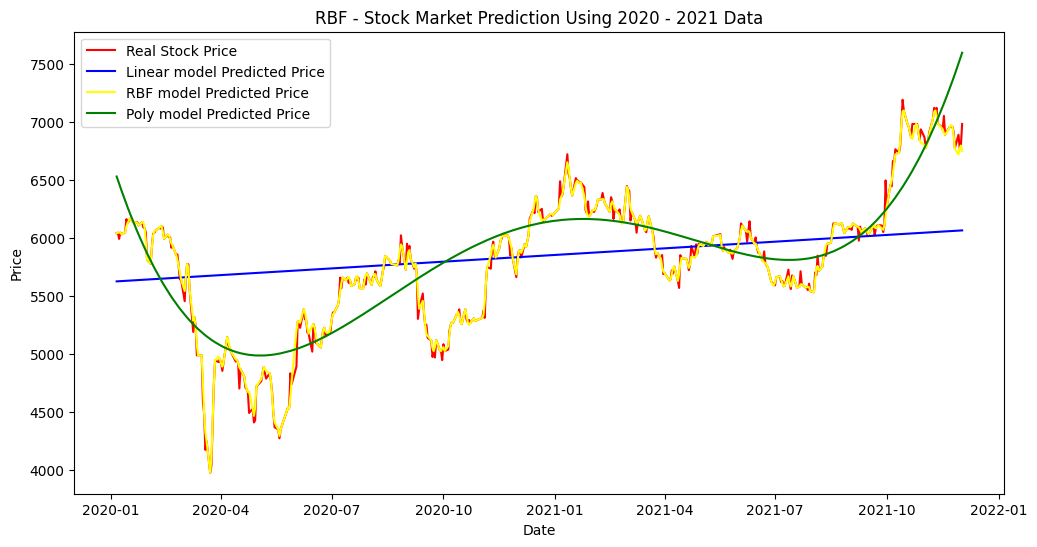

In [71]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))

SVR RBF Train RMSE: 11.87
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 3.90
SVR RBF Test RMSE: 50.13
SVR RBF Test R2 Score: 0.99
SVR RBF Test MAE Score: 23.66


In [73]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 484.65
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 351.29
SVR Linear Test RMSE: 530.33
SVR Linear Test R2 Score: 0.21
SVR Linear Test MAE Score: 410.22


In [74]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 160.80
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 121.62
SVR Poly Test RMSE: 316.33
SVR Poly Test R2 Score: 0.72
SVR Poly Test MAE Score: 243.83
